In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import glob
import os

import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 6]
import matplotlib.pyplot as plt

import utils
from add_fourier import get_fourier_fn

In [3]:
def read_file(filename):
    with open(filename, 'r') as f:
        data = json.load(f)

    df = pd.DataFrame.from_dict(data['data'])
    df.sort_values('lon', inplace=True)
#     df = df[df.obs_to_target < 6.0E7]
    return df

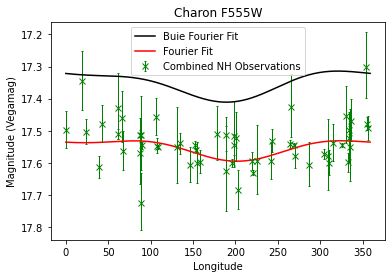

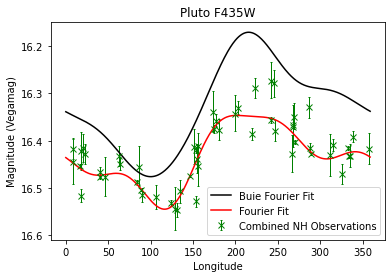

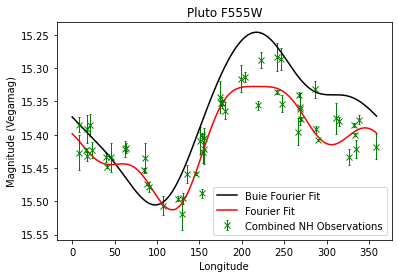

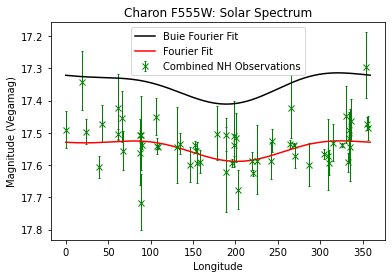

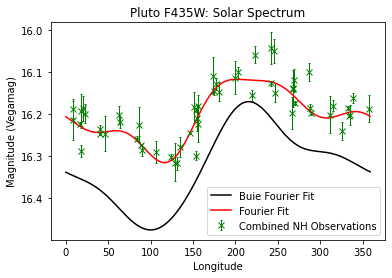

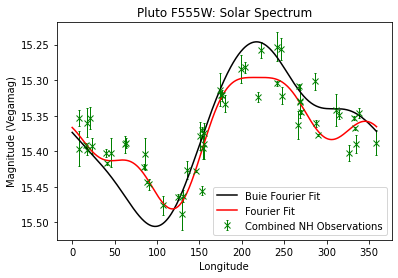

In [9]:
def show_curve(data_file, solar=False):
    if solar:
        target, bandpass, = data_file.split("_")
    else:
        target, bandpass = data_file.split("_")
        
    target = target.capitalize()
    bandpass = f"F{bandpass}W"
    plt.title(f"{target} {bandpass}{': Solar Spectrum' if solar else ''}")

    filename = f"output/{data_file}{'_solar' if solar else ''}.json"
    df = read_file(filename)
    yerr = [df.multi_vegamag_sigma_plus, df.multi_vegamag_sigma_minus]


    plt.errorbar(df.lon, df.multi_vegamag, yerr=yerr, 
                 fmt='x', c='green', elinewidth=1, capsize=1,
                 label='Combined NH Observations')
    
    buie_x = np.arange(360)
    buie_y = get_fourier_fn(f"data/buie_fourier_{data_file}.json")(buie_x)
    plt.plot(buie_x, buie_y, c="black", label="Buie Fourier Fit")
    
    fit_x = np.arange(360)
    fit_y = get_fourier_fn(filename)(fit_x)
    plt.plot(fit_x, fit_y, c="red", label="Fourier Fit")

    plt.xlabel("Longitude")
    plt.ylabel("Magnitude (Vegamag)")
    plt.legend()
    plt.gca().invert_yaxis()
    figname = data_file + '_lon.svg'
    plt.savefig(figname, bbox_inches='tight')
    plt.show()

# show_curve("charon_435")
show_curve("charon_555")
show_curve("pluto_435")
show_curve("pluto_555")
show_curve("charon_555", solar=True)
show_curve("pluto_435", solar=True)
show_curve("pluto_555", solar=True)

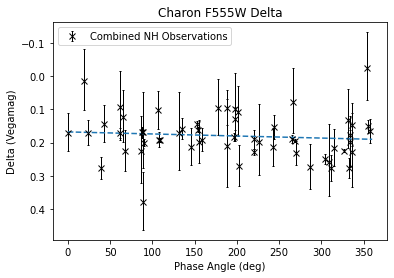

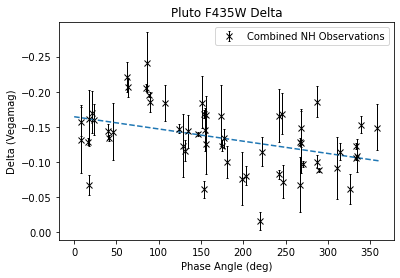

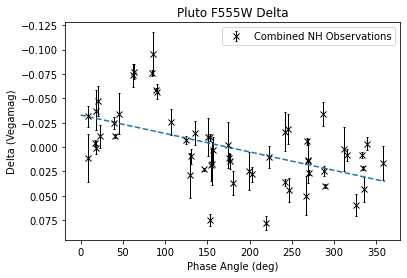

In [5]:
def show_err(data_file):
    target, bandpass = data_file.split("_")
    target = target.capitalize()
    bandpass = f"F{bandpass}W"
    plt.title(f"{target} {bandpass} Delta")

    df = read_file(f"output/{data_file}.json")
    yerr = [df.multi_vegamag_buie_delta_sigma_plus, df.multi_vegamag_buie_delta_sigma_minus]


    plt.errorbar(df.lon, df.multi_vegamag_buie_delta, yerr=yerr, 
                 fmt='x', c='black', elinewidth=1, capsize=1,
                 label='Combined NH Observations')

    # Fits
    fit = np.polyfit(df.lon, df.multi_vegamag_buie_delta, 1)
    xs = [0, 360]
    plt.plot(xs, [np.poly1d(fit)(x) for x in xs], '--')

    plt.xlabel("Phase Angle (deg)")
    plt.ylabel("Delta (Vegamag)")
    plt.legend()
    plt.gca().invert_yaxis()
    figname = data_file + '_buie_delta.jpg'
    plt.savefig(figname, bbox_inches='tight')
    plt.show()

    
# show_err("charon_435")
show_err("charon_555")
show_err("pluto_435")
show_err("pluto_555")